<a href="https://colab.research.google.com/github/nikhilagrawal2000/Decoupling-MDOF-Coupled-Systems/blob/new_branch/Decoupling_MDOF_Coupled_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
n = 2 #@param {type: "number", min: 0}
k = np.zeros([n, n])
m = np.zeros([n, n])
x = np.zeros([n, 1])

In [0]:
data_val = 'Same' #@param ["Same", "Different"]{type: "string", allow-input: false}
if data_val == 'Same':
  k_val = 1 #@param {type: "number", min: 0}
  m_val = 1 #@param {type: "number", min: 0}
  for i in range(n):
    m[i][i] = m_val
    k[i][i] = 2*k_val
  for i in range(n-1):
    k[i+1][i] = -1*k_val
    k[i][i+1] = -1*k_val

elif data_val == 'Different':
  k_val = np.zeros([n+1, 1])
  m_val = np.zeros([n, 1])
  # for i in range(n):
    # k_val[i] = 0 #@param {type: "number", min: 0}
    # m_val[i] = 0 #@param {type: "number", min: 0}
  for i in range(n):
    k_val[i] = input("k_val[{}]".format(i+1))
  for i in range(n):
    m_val[i] = input("m_val[{}]".format(i+1)) 
  for j in range(n):
    m[j][j] = m_val[j]
  for i in range(n):
    k[i][i] = k_val[i] + k_val[i+1]
  for i in range(n-1):
    k[i+1][i] = -1*k_val[i+1]
    k[i][i+1] = -1*k_val[i+1]

In [0]:
print(k)
print(m)

[[ 2. -1.]
 [-1.  2.]]
[[1. 0.]
 [0. 1.]]


In [0]:
m_inv = np.linalg.inv(m)

In [0]:
k_mult_m_inv = np.dot(m_inv, k)

In [0]:
from scipy import linalg as LA

e_vals, e_vecs = LA.eig(k_mult_m_inv)

In [0]:
print(e_vals)
print(e_vecs)

[3.+0.j 1.+0.j]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [0]:
w = np.sqrt(e_vals)

In [0]:
print(w)
print(w.shape)

[1.73205081+0.j 1.        +0.j]
(2,)


In [0]:
from scipy.optimize import fsolve, root
import random

In [0]:
x_val = np.zeros([n, 1])
x_acc = np.zeros([n, 1])

data_val_x = 'Same' #@param ["Same", "Different"]{type: "string", allow-input: false}

if data_val_x == 'Same':
  for i in range(n):
    x_val[i] = random.uniform(0, 10)
    x_acc[i] = random.uniform(0, 10)
elif data_val_x == 'Different':
  for i in range(n):
    x_val[i] = input("x_val[{}]".format(i+1))
  for i in range(n):
    x_acc[i] = input("x_acc[{}]".format(i+1))

def func(z):
  z = np.array(z).reshape((2*n, 1))
  # z.reshape((2*n, 1))
  c = np.array(z[0:n]).reshape((n, 1)) 
  phi = np.array(z[n:2*n]).reshape((n, 1))
  c_phi = np.multiply(c, np.cos(phi))
  f = np.zeros([2*n, 1])
  f[0:n] = np.array(x_val[0:n]).reshape((n, 1))
  arr = np.array(x_acc[0:n]).reshape((n, 1))
  for i in range(n, 2*n):
    f[i] = arr[i - n]
  c_phi_eig = np.dot(np.transpose(c_phi), np.transpose(e_vecs))
  print(c_phi_eig.shape)
  f[0:n] = np.transpose(c_phi_eig)
  c_phi_sin = np.multiply(c, np.sin(phi))
  print(c_phi_sin.shape)
  c_phi_sin_w = np.multiply(w.reshape((n, 1)), c_phi_sin)
  print(c_phi_sin_w.shape)
  c_phi_eig_sin = np.dot(np.transpose(c_phi_sin_w), np.transpose(e_vecs))
  arr_1 = np.transpose(c_phi_eig_sin)
  print("arr_1 : ", arr_1.shape)
  for i in range(n, 2*n):
    f[i] = arr_1[i - n]
  
  return f.ravel()

z = fsolve(func, np.ones([2*n, 1]).ravel())
# z = root(func, np.zeros([2*n, 1]).ravel(), method = 'lm')

(1, 2)
(2, 1)
(2, 1)
arr_1 :  (2, 1)
(1, 2)
(2, 1)
(2, 1)
arr_1 :  (2, 1)
(1, 2)
(2, 1)
(2, 1)
arr_1 :  (2, 1)
(1, 2)
(2, 1)
(2, 1)
arr_1 :  (2, 1)
(1, 2)
(2, 1)
(2, 1)
arr_1 :  (2, 1)
(1, 2)
(2, 1)
(2, 1)
arr_1 :  (2, 1)
(1, 2)
(2, 1)
(2, 1)
arr_1 :  (2, 1)
(1, 2)
(2, 1)
(2, 1)
arr_1 :  (2, 1)
(1, 2)
(2, 1)
(2, 1)
arr_1 :  (2, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part


In [0]:
print(z)

[3.61121123e-17 2.21616244e-17 1.00000001e+00 1.00000000e+00]


In [0]:
print(func(z))

(1, 2)
(2, 1)
(2, 1)
arr_1 :  (2, 1)
[ 2.22635640e-17 -5.32980365e-18  5.04030681e-17 -2.40302989e-17]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part


In [0]:
t = np.linspace(0, 10, 1000)
print(t.shape)
e_vec_t = np.transpose(e_vecs)
e_vecs_col = e_vec_t[:, 0]
x_n = np.zeros((n ,t.shape[0]))
x_n_eigen = np.zeros((n, t.shape[0]))
for i in range(n):
  x_n[i] = np.multiply(z[i], np.cos(np.add(np.multiply(w[i],t), z[i+n])))
  x_n_eigen[i] = np.multiply(e_vecs_col[i], x_n[i])

(1000,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [0]:
print(x_n_eigen)

[[ 1.37966838e-17  1.34220895e-17  1.30434606e-17 ...  2.15841050e-17
   2.18174131e-17  2.20441630e-17]
 [ 8.46688019e-18  8.33446236e-18  8.20120943e-18 ... -2.44362801e-19
  -8.75090385e-20  6.93534927e-20]]


In [0]:
x_n_sum = x_n_eigen.sum(axis = 0)
print(x_n_sum)

[ 2.22635640e-17  2.17565519e-17  2.12446701e-17  2.07280457e-17
  2.02068072e-17  1.96810843e-17  1.91510077e-17  1.86167096e-17
  1.80783229e-17  1.75359818e-17  1.69898217e-17  1.64399787e-17
  1.58865900e-17  1.53297937e-17  1.47697289e-17  1.42065353e-17
  1.36403537e-17  1.30713255e-17  1.24995929e-17  1.19252986e-17
  1.13485862e-17  1.07695999e-17  1.01884842e-17  9.60538451e-18
  9.02044638e-18  8.43381602e-18  7.84563996e-18  7.25606514e-18
  6.66523879e-18  6.07330844e-18  5.48042187e-18  4.88672703e-18
  4.29237206e-18  3.69750520e-18  3.10227477e-18  2.50682914e-18
  1.91131664e-18  1.31588558e-18  7.20684159e-19  1.25860466e-19
 -4.68437600e-19 -1.06206235e-18 -1.65486634e-18 -2.24670245e-18
 -2.83742387e-18 -3.42688418e-18 -4.01493738e-18 -4.60143793e-18
 -5.18624079e-18 -5.76920147e-18 -6.35017606e-18 -6.92902125e-18
 -7.50559443e-18 -8.07975366e-18 -8.65135775e-18 -9.22026631e-18
 -9.78633974e-18 -1.03494393e-17 -1.09094272e-17 -1.14661665e-17
 -1.20195214e-17 -1.25693

In [0]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

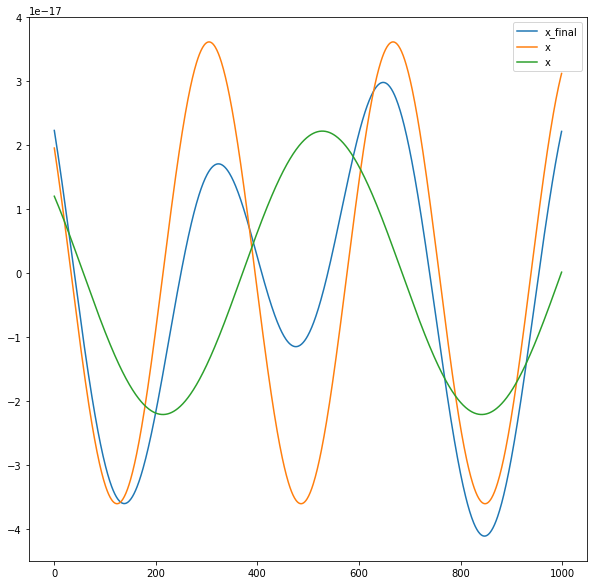

In [0]:
plt.figure(figsize=(10,10))
plt.plot(x_n_sum, label = 'x_final')
for i in range(n):
  plt.plot(x_n[i], label = 'x')
plt.legend()
plt.show()

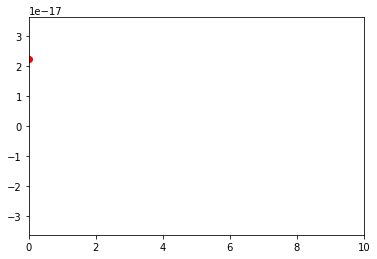

In [0]:
fig, ax = plt.subplots()
ax.set_xlim([0, 10])
ax.set_ylim([np.amin(x_n), np.amax(x_n)])
sinegraph, = ax.plot([], [])
dot, = ax.plot([],[], 'o', color='red', animated = True)

def sine(i):
    sinegraph.set_data(t[:i], x_n_sum[:i])
    dot.set_data(t[i], x_n_sum[i])
    return sinegraph
anim = animation.FuncAnimation(fig, sine, frames=1000, interval = 50, repeat = True)
plt.show()

mywriter = animation.FFMpegFileWriter(fps=25,codec="libx264")
anim.save("test.mp4", writer=mywriter)

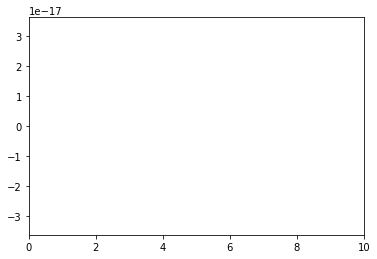

In [0]:
import matplotlib
# matplotlib.use('Qt5Agg') #use Qt5 as backend, comment this line for default backend

fig, ax = plt.subplots()

ax.set_xlim([0, 10])
ax.set_ylim([np.amin(x_n), np.amax(x_n)])
lines = [plt.plot([], [], animated = True)[0] for _ in range(n)] #lines to animate
dots = [ax.plot([],[], 'o', color='red', animated = True)[0] for _ in range(n)]

patches = lines + dots
def init():
    #init lines
    for line in lines:
      line.set_data([], [])

    for dot in dots:
      dot.set_data([], [])

    return patches #return everything that must be updated

def animate(i):
    #animate lines
    for j,line in enumerate(lines):
        line.set_data(t[:i], x_n[j][:i])

    for k,dot in enumerate(dots):
        dot.set_data(t[i], x_n[k][i])

    return patches #return everything that must be updated

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=20, blit=True)

plt.show()

mywriter = animation.FFMpegFileWriter(fps=25,codec="libx264")
anim.save("test_1.mp4", writer=mywriter)

In [0]:
# from google.colab.patches import cv2_imshow
# import cv2
# cap = cv2.VideoCapture('test.mp4') 
   
# # Check if camera opened successfully 
# if (cap.isOpened()== False):  
#   print("Error opening video  file") 
   
# # Read until video is completed 
# while(cap.isOpened()): 
      
#   # Capture frame-by-frame 
#   ret, frame = cap.read() 
#   if ret == True: 
   
#     # Display the resulting frame 
#     cv2_imshow(frame) 
   
#     # Press Q on keyboard to  exit 
#     if cv2.waitKey(25) & 0xFF == ord('q'): 
#       break
   
#   # Break the loop 
#   else:  
#     break
   
# # When everything done, release  
# # the video capture object 
# cap.release() 
   
# # Closes all the frames 
# cv2.destroyAllWindows() 

In [0]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('test_1.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


In [0]:

mp4 = open('test.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)